# **geolocation.csv,  amenities.csv**

## **Data Validation**


Data contained in the geolocation.csv file:


* **unified_id**: identifier, 49311 non-zero values, 49274 of which are duplicates and should be unique;
* **month**: 49311 non-zero values, month and year in YYYY-mm format in which the property was put up for sale;
* **street_name**: 11589 non-zero values - strings, street name;
* **latitude**: 49311 non-zero values - real numbers, the latitude at which the object is located;
* **longitude**: 49311 non-zero values - real numbers, the longitude at which the object is located.


Data contained in the amenities.csv file:


* **unified_id**: identifier, 49311 non-zero values, 49274 of which are duplicates, should be unique;
* **month**: 49311 non-zero values, month and year in YYYY-mm format, in which the item was put up for sale;
* **hot_tub**: 49311 binary values, the presence of a jacuzzi;
* **pool**: 49311 binary values, the presence of a swimming pool.

In [1]:
import pandas as pd

In [2]:
geolocation = pd.read_csv('geolocation.csv', sep=';')

geolocation.head()

,unified_id,month,street_name,latitude,longitude
0,AIR10052559,2022-12,Heavenly Valley Road,"34,23948","-116,87991"
1,AIR10178668,2022-12,Round Drive,"34,25095","-116,94139"
2,AIR10211700,2022-12,NaN,"34,24516","-116,87618"
3,AIR10344705,2022-12,NaN,"34,2675","-116,86089"
4,AIR10424683,2022-12,Starvation Flats Road,"34,25341","-116,88025"


In [3]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49311 entries, 0 to 49310
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   unified_id   49311 non-null  object
 1   month        49311 non-null  object
 2   street_name  11589 non-null  object
 3   latitude     49311 non-null  object
 4   longitude    49311 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB


In [4]:
amenities = pd.read_csv('amenities.csv', sep=';')

amenities.head()

,unified_id,month,hot_tub,pool
0,AIR10052559,2022-12,1,0
1,AIR10178668,2022-12,0,0
2,AIR10211700,2022-12,0,0
3,AIR10344705,2022-12,0,0
4,AIR10424683,2022-12,0,1


In [5]:
amenities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49311 entries, 0 to 49310
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   unified_id  49311 non-null  object
 1   month       49311 non-null  object
 2   hot_tub     49311 non-null  int64 
 3   pool        49311 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.5+ MB


In [6]:
geolocation[geolocation['unified_id'].isin(amenities['unified_id'])]['unified_id']

,unified_id
0,AIR10052559
1,AIR10178668
2,AIR10211700
3,AIR10344705
4,AIR10424683
...,...
49306,AIR9959855
49307,AIR9960008
49308,AIR9976790
49309,AIR9986505


In [7]:
geolocation[geolocation['month'].isin(amenities['month'])]['month']

,month
0,2022-12
1,2022-12
2,2022-12
3,2022-12
4,2022-12
...,...
49306,2020-01
49307,2020-01
49308,2020-01
49309,2020-01


We see that geolocation and amenities have the same values in the unified_id and month columns. We join these tables. Next, we work with geo_amenities.

In [8]:
geo_amenities = pd.merge(geolocation, amenities, on=['unified_id', 'month'], how='inner')

geo_amenities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49311 entries, 0 to 49310
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   unified_id   49311 non-null  object
 1   month        49311 non-null  object
 2   street_name  11589 non-null  object
 3   latitude     49311 non-null  object
 4   longitude    49311 non-null  object
 5   hot_tub      49311 non-null  int64 
 6   pool         49311 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.6+ MB


In [9]:
geo_amenities.isna().sum()

,0
unified_id,0
month,0
street_name,37722
latitude,0
longitude,0
hot_tub,0
pool,0


In [10]:
(geo_amenities['street_name'].nunique(), geo_amenities['month'].nunique(), geo_amenities['unified_id'].nunique())

(242, 36, 2151)

In [11]:
geo_amenities[geo_amenities['street_name'].isna() == True]

,unified_id,month,street_name,latitude,longitude,hot_tub,pool
2,AIR10211700,2022-12,NaN,"34,24516","-116,87618",0,0
3,AIR10344705,2022-12,NaN,"34,2675","-116,86089",0,0
7,AIR11209785,2022-12,NaN,"34,23943","-116,85551",1,0
15,AIR11799363,2022-12,NaN,"34,23996","-116,92826",0,0
22,AIR12495850,2022-12,NaN,"34,24372","-116,9171",0,0
...,...,...,...,...,...,...,...
49272,AIR9200947,2020-01,NaN,"34,24815372","-116,8651378",1,0
49276,AIR932814,2020-01,NaN,"34,19565","-116,39799",0,0
49278,AIR9329648,2020-01,NaN,"34,25410259","-116,9159801",0,0
49287,AIR9497839,2020-01,NaN,"34,14880091","-116,246797",0,1


In [12]:
geo_amenities['unified_id'].duplicated(keep=False).sum()

49274

In [13]:
geo_amenities[geo_amenities['unified_id'].duplicated(keep=False)].sort_values(by='unified_id')

,unified_id,month,street_name,latitude,longitude,hot_tub,pool
19139,AIR10000347,2021-06,Cienega Road,"34,24223","-116,9433",0,0
20486,AIR10000347,2021-05,Cienega Road,"34,24223","-116,9433",0,0
26207,AIR10000347,2021-01,Cienega Road,"34,24223","-116,9433",0,0
32356,AIR10000347,2020-09,Cienega Road,"34,24223","-116,9433",0,0
24742,AIR10000347,2021-02,Cienega Road,"34,24223","-116,9433",0,0
...,...,...,...,...,...,...,...
47229,AIR9996370,2020-02,Eagle Mountain Drive,"34,26706673","-116,8611341",0,0
4531,AIR9996370,2022-08,Eagle Mountain Drive,"34,26707","-116,86113",0,0
26206,AIR9996370,2021-02,Eagle Mountain Drive,"34,26707","-116,86113",0,0
45186,AIR9996370,2020-03,Eagle Mountain Drive,"34,26706673","-116,8611341",0,0


In [14]:
geo_amenities[['unified_id', 'street_name', 'latitude', 'longitude']].duplicated(keep=False).sum()

49033

In [15]:
geo_amenities[['street_name']].duplicated(keep=False).sum()

49310

## **Data Cleaning and Data Types Validation**


The following was done in this part:


* Filled in the gaps in **street_name** with the value 'Unknown';
* Duplicates where the values of the **unified_id**, **street_name**, **latitude**, **longitude** columns are the same were removed. The identifiers of sales objects **unified_id** are not unique, but some of these lines have different locations. It was decided to leave them for now. Some duplicate rows have different **month** values, so this column was not taken into account when removing duplicates;
* **latitude** and **longitude** converted to float data type;
* **month** converted to datetime data type;
* **street_name** converted to category data type.

In [16]:
geo_amenities['street_name'].fillna('Unknown', inplace=True)

geo_amenities.isna().sum()

<ipython-input-16-8a41003005e5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  geo_amenities['street_name'].fillna('Unknown', inplace=True)


,0
unified_id,0
month,0
street_name,0
latitude,0
longitude,0
hot_tub,0
pool,0


In [17]:
geo_amenities = geo_amenities.drop_duplicates(subset=['unified_id', 'street_name', 'latitude', 'longitude'], keep='first')

geo_amenities[['unified_id', 'street_name', 'latitude', 'longitude']].duplicated(keep=False).sum()

0

In [18]:
geo_amenities['unified_id'].duplicated(keep=False).sum()

4938

In [19]:
geo_amenities.duplicated(keep=False).sum()

0

In [20]:
geo_amenities.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5239 entries, 0 to 49141
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   unified_id   5239 non-null   object
 1   month        5239 non-null   object
 2   street_name  5239 non-null   object
 3   latitude     5239 non-null   object
 4   longitude    5239 non-null   object
 5   hot_tub      5239 non-null   int64 
 6   pool         5239 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 327.4+ KB


In [21]:
geo_amenities['latitude'] = geo_amenities['latitude'].str.replace(',','.')
geo_amenities['longitude'] = geo_amenities['longitude'].str.replace(',','.')

geo_amenities['latitude'] = geo_amenities['latitude'].astype(float)
geo_amenities['longitude'] = geo_amenities['longitude'].astype(float)
geo_amenities['month'] = pd.to_datetime(geo_amenities['month'], format='%Y-%m')
geo_amenities['street_name'] = geo_amenities['street_name'].astype('category')

geo_amenities.dtypes

,0
unified_id,object
month,datetime64[ns]
street_name,category
latitude,float64
longitude,float64
hot_tub,int64
pool,int64


# **sales**

## **Data Validation**


Data containing sales:


* **Url**: 353 non-zero values - strings containing a reference to the object;
* **Zestimate**: 321 non-zero values - real numbers containing the price at which the object was estimated;
* **Price**: 353 non-zero value - integers containing the price for which the object is put up for sale;
* **Rent Zestimate**: 330 non-zero values - real numbers that contain the rental price of the property;
* **Days on Zillow**: 353 non-zero values, should indicate the number of days the property has been listed on the real estate website, but have only one categorical value - 'Not specified';
* **Bathrooms**: 353 non-zero values - integers containing the number of bathrooms in the property;
* **Bedrooms**: 353 non-zero values - integers containing the number of bedrooms in the object;
* **Living Area**: 353 non-zero values - integers (302 categories) - the code of the living area of the object;
* **Lot Size**: empty column, must contain information about the size of the parking lot of the object (?);
* **Home Type**: there are no zero values, but the column has only one category 'SINGLE_FAMILY' - the object is designed for one family;
* **Street Address**: 353 non-zero values - 350 unique rows - the street address of the object;
* **City**: 353 non-zero values - 5 unique strings - the city of the object;
* **Zip**: 353 non-zero values - 4 unique integers containing the object's zip code. The values correlate with City;
* **State**: 353 non-zero values - 1 unique string 'CA' (California) - the state of the object;
* **Country**: 353 non-zero values - 1 unique string 'USA' - the country of the object;
* **Broker Name**: 353 non-zero values - 142 unique strings - brokerage company/broker name;
* **Has 3D Model**: 353 non-zero values - binary variable, 0 - no 3D model of the object, 1 - 3D model is available;
* **Has Image**: 353 non-zero values - binary variable, contains only 1 value - the presence of photos of the object;
* **Has Video**: 353 non-zero values - binary variable, 0 - no video of the property, 1 - video is available;
* **isZillowOwned**: 353 non-zero values - 1 unique string 'FALSO';
* **sgapt**: 353 non-zero values - 4 unique strings - type of property for sale;
* **statusText**: 353 non-zero values - 4 unique strings - description of the status of the object, the meaning of the content is the same as in the sgapt column;
* **statusType**: 353 non-zero values - 1 unique string 'FOR_SALE' - the reason for placing the object;
* **Pool**: 353 non-zero values - a binary variable, 0 - there is no pool in the object, 1 - there is a pool;

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [23]:
sales_1 = pd.read_csv('sales_properties_total_zipcode_92252.csv', sep=';')
sales_2 = pd.read_csv('sales_properties_total_zipcode_92284.csv', sep=';')
sales_3 = pd.read_csv('sales_properties_total_zipcode_92314.csv', sep=';')
sales_4 = pd.read_csv('sales_properties_total_zipcode_92315.csv', sep=';')
sales_5 = pd.read_csv('sales_properties_with_pool_zipcode_92252.csv', sep=';')
sales_6 = pd.read_csv('sales_properties_with_pool_zipcode_92284.csv', sep=';')

In [24]:
sales_list = [sales_1, sales_2, sales_3, sales_4, sales_5, sales_6]

for i in range(len(sales_list)):
    for j in range(i + 1, len(sales_list)):
        duplicates = sales_list[i][sales_list[i].isin(sales_list[j].to_dict(orient='list')).all(axis=1)]
        print(f'Duplicates in sales_{i+1} and sales_{j+1}: ', duplicates.shape[0])

Duplicates in sales_1 and sales_2:  0
Duplicates in sales_1 and sales_3:  0
Duplicates in sales_1 and sales_4:  0
Duplicates in sales_1 and sales_5:  15
Duplicates in sales_1 and sales_6:  0
Duplicates in sales_2 and sales_3:  0
Duplicates in sales_2 and sales_4:  0
Duplicates in sales_2 and sales_5:  0
Duplicates in sales_2 and sales_6:  15
Duplicates in sales_3 and sales_4:  0
Duplicates in sales_3 and sales_5:  0
Duplicates in sales_3 and sales_6:  0
Duplicates in sales_4 and sales_5:  0
Duplicates in sales_4 and sales_6:  0
Duplicates in sales_5 and sales_6:  0


We removed contradictory values: duplicates that are marked as having a pool in one table and vice versa in another.

In [25]:
sales_1 = sales_1[~sales_1.isin(duplicates.to_dict(orient='list')).all(axis=1)]
sales_2 = sales_2[~sales_2.isin(duplicates.to_dict(orient='list')).all(axis=1)]

Added the **Pool** column to all tables. Values correspond to file names.

In [26]:
sales_1['Pool'] = 0
sales_2['Pool'] = 0
sales_3['Pool'] = 0
sales_4['Pool'] = 0
sales_5['Pool'] = 1
sales_6['Pool'] = 1

In [27]:
sales = pd.concat([sales_1, sales_2, sales_3, sales_4, sales_5, sales_6], axis=0, ignore_index=True)

In [28]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Url             383 non-null    object 
 1   Zestimate       348 non-null    float64
 2   Price           383 non-null    int64  
 3   Rent Zestimate  358 non-null    float64
 4   Days On Zillow  383 non-null    object 
 5   Bathrooms       383 non-null    int64  
 6   Bedrooms        383 non-null    int64  
 7   Living Area     383 non-null    int64  
 8   Lot Size        0 non-null      float64
 9   Home Type       383 non-null    object 
 10  Street Address  383 non-null    object 
 11  City            383 non-null    object 
 12  Zip             383 non-null    int64  
 13  State           383 non-null    object 
 14  Country         383 non-null    object 
 15  Broker Name     360 non-null    object 
 16  Has 3D Model    383 non-null    object 
 17  Has Image       383 non-null    obj

In [29]:
sales.head()

,Url,Zestimate,Price,Rent Zestimate,Days On Zillow,Bathrooms,Bedrooms,Living Area,Lot Size,Home Type,...,Country,Broker Name,Has 3D Model,Has Image,Has Video,isZillowOwned,sgapt,statusText,statusType,Pool
0,https://www.zillow.com/homedetails/8198-Uphill...,NaN,18000000,2435.0,Not specified,4,3,5470,NaN,SINGLE_FAMILY,...,USA,AKGRE Inc,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE,0
1,https://www.zillow.com/homedetails/4757-Avenid...,223200.0,399990,1786.0,Not specified,2,3,1056,NaN,SINGLE_FAMILY,...,USA,Champion Realty,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE,0
2,https://www.zillow.com/homedetails/61018-Presc...,568947.0,575000,2300.0,Not specified,2,3,1577,NaN,SINGLE_FAMILY,...,USA,BHG Desert Lifestyle Properties,VERDADERO,VERDADERO,VERDADERO,FALSO,For Sale (Broker),House for sale,FOR_SALE,0
3,https://www.zillow.com/homedetails/61875-Anaco...,851656.0,899000,4798.0,Not specified,2,3,1434,NaN,SINGLE_FAMILY,...,USA,Cherie Miller & Assoc.,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE,0
4,https://www.zillow.com/homedetails/61879-Petun...,NaN,369900,1825.0,Not specified,1,3,1040,NaN,SINGLE_FAMILY,...,USA,Cherie Miller & Assoc.,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE,0


In [30]:
sales.duplicated().sum()

0

In [31]:
sales.nunique()

,0
Url,353
Zestimate,318
Price,227
Rent Zestimate,232
Days On Zillow,1
Bathrooms,10
Bedrooms,7
Living Area,302
Lot Size,0
Home Type,1


In [32]:
sales.groupby(['Zip', 'City']).size()

Zip    City            
92252  Joshua Tree          87
       Panorama Heights      1
92284  Yucca Valley        132
92314  Big Bear City        57
92315  Big Bear Lake       106
dtype: int64

In [33]:
sales.isna().sum()

,0
Url,0
Zestimate,35
Price,0
Rent Zestimate,25
Days On Zillow,0
Bathrooms,0
Bedrooms,0
Living Area,0
Lot Size,383
Home Type,0


In [34]:
(sales['Bathrooms'].value_counts(), sales['Bedrooms'].value_counts())

(Bathrooms
 2     201
 3     106
 4      41
 1      15
 5       9
 6       4
 7       4
 10      1
 0       1
 9       1
 Name: count, dtype: int64,
 Bedrooms
 3    258
 4     91
 5     25
 6      5
 7      2
 8      1
 9      1
 Name: count, dtype: int64)

In [35]:
(sales['sgapt'].value_counts(), sales['statusText'].value_counts())

(sgapt
 For Sale (Broker)    348
 New Construction      30
 Foreclosure            4
 Unknown Listed By      1
 Name: count, dtype: int64,
 statusText
 House for sale      348
 New construction     30
 Foreclosure           4
 Auction               1
 Name: count, dtype: int64)

In [36]:
(sales['Has 3D Model'].unique(), sales['Has Video'].unique())

(array(['FALSO', 'VERDADERO'], dtype=object),
 array(['FALSO', 'VERDADERO'], dtype=object))

In [37]:
(sales['Has 3D Model'] == sales['Has Video']).all()

False

In [38]:
sales['City'].value_counts()

,count
City,
Yucca Valley,132
Big Bear Lake,106
Joshua Tree,87
Big Bear City,57
Panorama Heights,1


## **Data Cleaning and Data Types Validation**


The following was done in this part:


* Removed columns that had too few, too many values to analyze, had the same information: Url, Days On Zillow, Lot Size, Home Type, State, Country, Has Image, isZillowOwned, statusType, Zip, Broker Name, Living Area, statusText;
* Removed the value of the **sgapt** column 'Unknown Listed By' and the value of the **City** column 'Panorama Heights' due to the small number of objects with such values;
* The **Has 3D Model** and **Has Video** columns are converted to bool data type;
* The **City** and **sgapt** columns are converted to the category data type;
* Data distribution graphs were created to analyze the impact of the number of bedrooms and bathrooms on the price and rental price of the property. It was decided to delete the rows in which **Bathrooms** equals 0 or 9, as well as in which **Bedrooms** equals 8 due to the small number of objects for analysis (1 representative) and their significant difference, which will affect the quality of the analysis if combined with other categories.
* **Bathrooms** are converted to the category data type with the following categories: 1, 2, 3, 4, 5+;
* **Bedrooms** converted to category data type with the following categories: 3, 4, 5+;
* To further merge the **geo_amenities** and **sales** tables, the numeric part of the values of the **Street Address** column was deleted.



Zero values of the **Zestimate** and **Rent Zestimate** columns will be processed in **Exploratory Analysis**.

In [39]:
sales = sales.drop(columns=['Url', 'Days On Zillow', 'Lot Size', 'Home Type', 'State', 'Country', 'Has Image', 'isZillowOwned', 'statusType', 'Zip', 'Broker Name', 'Living Area', 'statusText'])

sales = sales[sales['sgapt'] != 'Unknown Listed By']
sales = sales[sales['City'] != 'Panorama Heights']

In [40]:
duplicates_mask = sales.duplicated(subset=sales.columns.difference(['Pool']), keep=False)

sales = sales[~((duplicates_mask) & (sales['Pool'] == 0))]

In [41]:
sales.drop(columns = ['Pool']).duplicated().sum()

0

In [42]:
sales['Has 3D Model'] = sales['Has 3D Model'].replace({
    'FALSO': '0',
    'VERDADERO': '1'
})

sales['Has Video'] = sales['Has Video'].replace({
    'FALSO': '0',
    'VERDADERO': '1'
})


sales['Has 3D Model'] = sales['Has 3D Model'].astype(int)
sales['Has Video'] = sales['Has Video'].astype(int)

In [43]:
sales['City'] = sales['City'].astype('category')
sales['sgapt'] = sales['sgapt'].astype('category')

In [44]:
sales.dtypes

,0
Zestimate,float64
Price,int64
Rent Zestimate,float64
Bathrooms,int64
Bedrooms,int64
Street Address,object
City,category
Has 3D Model,int64
Has Video,int64
sgapt,category


<ipython-input-45-8e7d281399b2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sales, x='Bathrooms', y='Zestimate', palette='Set2')
<ipython-input-45-8e7d281399b2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sales, x='Bathrooms', y='Rent Zestimate', palette='Set2')
<ipython-input-45-8e7d281399b2>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sales, x='Bedrooms', y='Zestimate', palette='Set2')
<ipython-input-45-8e7d281399b2>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be rem

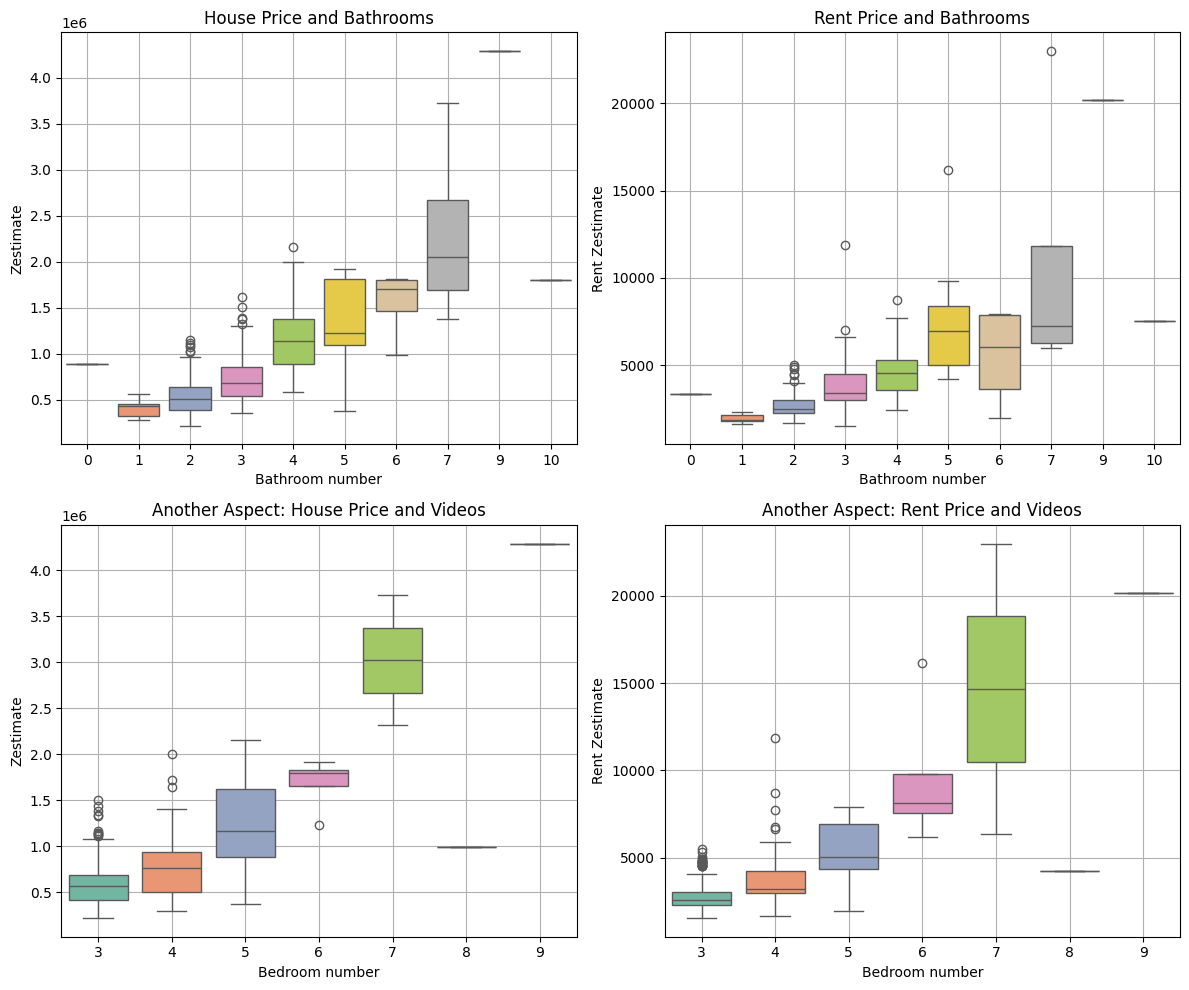

In [45]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.boxplot(data=sales, x='Bathrooms', y='Zestimate', palette='Set2')
plt.title('House Price and Bathrooms')
plt.xlabel('Bathroom number')
plt.ylabel('Zestimate')
plt.grid(True)

plt.subplot(2, 2, 2)
sns.boxplot(data=sales, x='Bathrooms', y='Rent Zestimate', palette='Set2')
plt.title('Rent Price and Bathrooms')
plt.xlabel('Bathroom number')
plt.ylabel('Rent Zestimate')
plt.grid(True)

plt.subplot(2, 2, 3)
sns.boxplot(data=sales, x='Bedrooms', y='Zestimate', palette='Set2')
plt.title('Another Aspect: House Price and Videos')
plt.xlabel('Bedroom number')
plt.ylabel('Zestimate')
plt.grid(True)

plt.subplot(2, 2, 4)
sns.boxplot(data=sales, x='Bedrooms', y='Rent Zestimate', palette='Set2')
plt.title('Another Aspect: Rent Price and Videos')
plt.xlabel('Bedroom number')
plt.ylabel('Rent Zestimate')
plt.grid(True)

plt.tight_layout()
plt.show()

In [46]:
sales = sales[~((sales['Bathrooms'] == 0) | (sales['Bathrooms'] == 9) | (sales['Bedrooms'] == 8))]

In [47]:
sales['Bathrooms'] = sales['Bathrooms'].replace({
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5+',
    6: '5+',
    7: '5+',
    10: '5+',
})

sales['Bedrooms'] = sales['Bedrooms'].replace({
    3: '3',
    4: '4',
    5: '5+',
    6: '5+',
    7: '5+',
    9: '5+',
})


sales['Bathrooms'] = sales['Bathrooms'].astype(pd.CategoricalDtype(categories=['1', '2', '3', '4', '5+'], ordered=True))
sales['Bedrooms'] = sales['Bedrooms'].astype(pd.CategoricalDtype(categories=['3', '4', '5+'], ordered=True))

<ipython-input-47-3dc8686931c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Bathrooms'] = sales['Bathrooms'].replace({
<ipython-input-47-3dc8686931c2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Bedrooms'] = sales['Bedrooms'].replace({
<ipython-input-47-3dc8686931c2>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [48]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 348 entries, 0 to 382
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Zestimate       316 non-null    float64 
 1   Price           348 non-null    int64   
 2   Rent Zestimate  326 non-null    float64 
 3   Bathrooms       348 non-null    category
 4   Bedrooms        348 non-null    category
 5   Street Address  348 non-null    object  
 6   City            348 non-null    category
 7   Has 3D Model    348 non-null    int64   
 8   Has Video       348 non-null    int64   
 9   sgapt           348 non-null    category
 10  Pool            348 non-null    int64   
dtypes: category(4), float64(2), int64(4), object(1)
memory usage: 23.8+ KB


In [49]:
sales['Street Address'] = sales['Street Address'].str.replace(r'^\d+\s*', '', regex=True)

<ipython-input-49-533ed0a337c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Street Address'] = sales['Street Address'].str.replace(r'^\d+\s*', '', regex=True)


In [50]:
sales.nunique()

,0
Zestimate,313
Price,224
Rent Zestimate,230
Bathrooms,5
Bedrooms,3
Street Address,272
City,4
Has 3D Model,2
Has Video,2
sgapt,3


## **Data Merging** - sales, geo_amenities

In this part, the **latitude**, **longtitude** columns of the streets that were available in the **geo_amenities** table were added to the **sales** table. The coordinates of the streets that were not represented there were found manually, filled in the xlsx file and inserted into the **sales** table.

The **pool** column is already present in the table, and the **hot_tub** column will have too many missing values for analysis, so it is not used.

In [51]:
geo_amenities['street_name'][geo_amenities['street_name'].isin(sales['Street Address'])]

,street_name
26150,Calle Del Rio
41106,Calle Del Rio


In [52]:
geo_amenities['street_name'].head()

,street_name
0,Heavenly Valley Road
1,Round Drive
2,Unknown
3,Unknown
4,Starvation Flats Road


In [53]:
sales['Street Address'].head()

,Street Address
0,Uphill Rd
1,Avenida La Espana Daga
2,Prescott Trl
3,Anaconda Dr
4,Petunia Dr


The **sales** table uses abbreviated street designations, so the following steps were taken:

In [54]:
replacement_dict = {
    'Ave': 'Avenue',
    'Blvd': 'Boulevard',
    'Cir': 'Circle',
    'Ct': 'Court',
    'Dr': 'Drive',
    'Ln': 'Lane',
    'Rd': 'Road',
    'St': 'Street',
    'Trl': 'Trail',
    'Pl': 'Place',
    'Vw': 'View',
    'Hwy': 'Highway',
    'Pkwy': 'Parkway'
}



def replace_abbreviations(addresses, replacements):
    for short, full in replacements.items():
        addresses = addresses.str.replace(r'\b' + short + r'\b', full, regex=True)
    return addresses


sales['Street Address'] = replace_abbreviations(sales['Street Address'], replacement_dict)


<ipython-input-54-cb6af6804928>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Street Address'] = replace_abbreviations(sales['Street Address'], replacement_dict)


We can see that more values already match:

In [55]:
geo_amenities['street_name'][geo_amenities['street_name'].isin(sales['Street Address'])]

,street_name
0,Heavenly Valley Road
1,Round Drive
6,La Crescenta Drive
8,Waynoka Lane
16,Eureka Drive
...,...
45109,La Crescenta Drive
45140,Switzerland Drive
45218,Teakwood Drive
45282,Sheephorn Road


In [56]:
sales[~sales['Street Address'].isin(geo_amenities['street_name'])]['Street Address'].nunique()

201

In [57]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 348 entries, 0 to 382
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Zestimate       316 non-null    float64 
 1   Price           348 non-null    int64   
 2   Rent Zestimate  326 non-null    float64 
 3   Bathrooms       348 non-null    category
 4   Bedrooms        348 non-null    category
 5   Street Address  348 non-null    object  
 6   City            348 non-null    category
 7   Has 3D Model    348 non-null    int64   
 8   Has Video       348 non-null    int64   
 9   sgapt           348 non-null    category
 10  Pool            348 non-null    int64   
dtypes: category(4), float64(2), int64(4), object(1)
memory usage: 23.8+ KB


In [58]:
(sales['Street Address'].nunique(), geo_amenities['street_name'].nunique())

(272, 243)

In [59]:
geo_amenities_unique_street = geo_amenities.drop_duplicates(subset = ['street_name'])

geo_amenities_unique_street['street_name'].nunique()

243

In [60]:
sales = pd.merge(sales, geo_amenities_unique_street[['street_name', 'latitude', 'longitude']],
                  left_on='Street Address', right_on='street_name',
                  how='left')


sales = sales.drop(columns=['street_name'])
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Zestimate       316 non-null    float64 
 1   Price           348 non-null    int64   
 2   Rent Zestimate  326 non-null    float64 
 3   Bathrooms       348 non-null    category
 4   Bedrooms        348 non-null    category
 5   Street Address  348 non-null    object  
 6   City            348 non-null    category
 7   Has 3D Model    348 non-null    int64   
 8   Has Video       348 non-null    int64   
 9   sgapt           348 non-null    category
 10  Pool            348 non-null    int64   
 11  latitude        105 non-null    float64 
 12  longitude       105 non-null    float64 
dtypes: category(4), float64(4), int64(4), object(1)
memory usage: 26.6+ KB


Next, we used the file **no_lat_lon.xlsx**, which had 3 columns: street name (only those missing from the **sales** table), its latitude, and its longitude. Street names that do not have coordinates were written to the file, the code is not presented here.

In [61]:
excel_data = pd.read_excel('no_lat_lon.xlsx', usecols=['street_name', 'latitude', 'longitude'])

merged_data = sales.merge(
    excel_data,
    how='left',
    left_on='Street Address',
    right_on='street_name'
)

merged_data['latitude'] = merged_data['latitude_x'].combine_first(merged_data['latitude_y'])
merged_data['longitude'] = merged_data['longitude_x'].combine_first(merged_data['longitude_y'])

merged_data = merged_data.drop(columns=['street_name', 'latitude_x', 'longitude_x', 'latitude_y', 'longitude_y'])

del excel_data

In [62]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Zestimate       316 non-null    float64 
 1   Price           348 non-null    int64   
 2   Rent Zestimate  326 non-null    float64 
 3   Bathrooms       348 non-null    category
 4   Bedrooms        348 non-null    category
 5   Street Address  348 non-null    object  
 6   City            348 non-null    category
 7   Has 3D Model    348 non-null    int64   
 8   Has Video       348 non-null    int64   
 9   sgapt           348 non-null    category
 10  Pool            348 non-null    int64   
 11  latitude        348 non-null    object  
 12  longitude       348 non-null    float64 
dtypes: category(4), float64(3), int64(4), object(2)
memory usage: 26.6+ KB


In [63]:
merged_data['latitude'] = merged_data['latitude'].astype(float)
merged_data['Street Address'] = merged_data['Street Address'].astype('category')

merged_data.duplicated().sum()

0

In [64]:
sales = merged_data

In [65]:
sales.head()

,Zestimate,Price,Rent Zestimate,Bathrooms,Bedrooms,Street Address,City,Has 3D Model,Has Video,sgapt,Pool,latitude,longitude
0,NaN,18000000,2435.0,4,3,Uphill Road,Joshua Tree,0,0,For Sale (Broker),0,34.097675,-116.283310
1,223200.0,399990,1786.0,2,3,Avenida La Espana Daga,Joshua Tree,0,0,For Sale (Broker),0,34.193399,-116.092657
2,568947.0,575000,2300.0,2,3,Prescott Trail,Joshua Tree,1,1,For Sale (Broker),0,34.109541,-116.331188
3,851656.0,899000,4798.0,2,3,Anaconda Drive,Joshua Tree,0,0,For Sale (Broker),0,34.100670,-116.301570
4,NaN,369900,1825.0,1,3,Petunia Drive,Joshua Tree,0,0,For Sale (Broker),0,34.144150,-116.316900


# **Exploratory Analysis**


In this part, the following was considered and done:



* Exceptions were processed - too high and too low values of numerical variables that would have a strong impact on future models;
* New columns **Overprice** and **Payback** were created for further analysis. Overprice displays the ratio between **Price** and **Zestimate**.
A value of **Overprice** greater than 1 indicates that the actual price exceeds the estimated value. **Payback** calculates the payback period of a property investment based on **Price** and **Rent Zestimate** - it shows how many months it takes to cover the purchase price through rent;
* Overprice, Payback fills in the missing values of the **Zestimate, Rent Zestimate** columns.

Graphs and conclusions are described below.

### **Outliers**

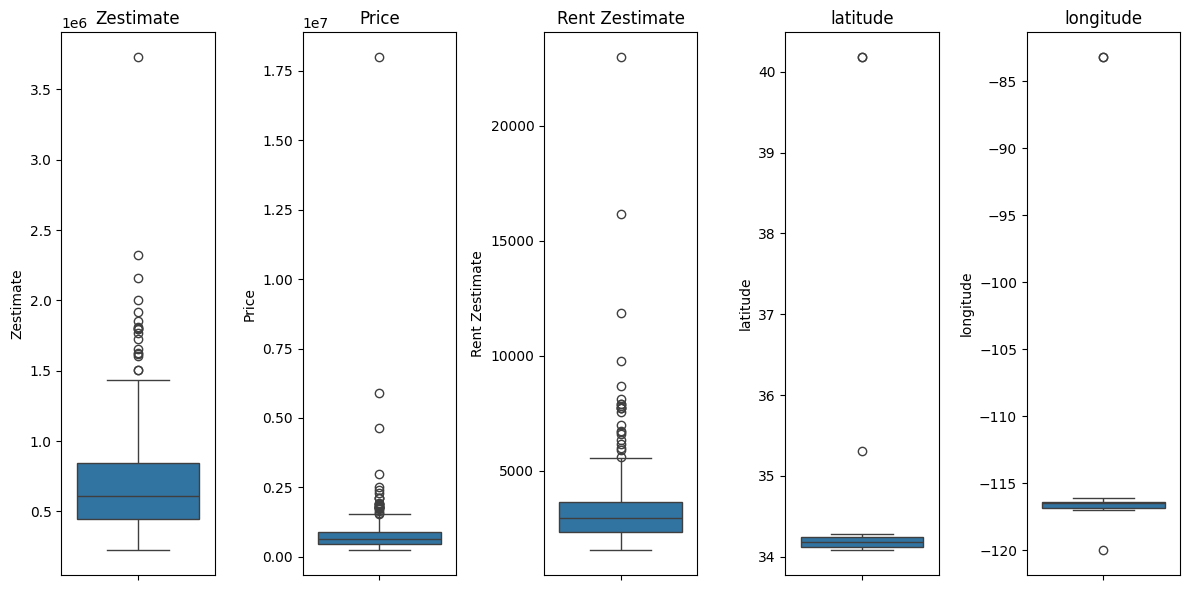

In [66]:
numeric_cols = ['Zestimate', 'Price', 'Rent Zestimate', 'latitude', 'longitude']

plt.figure(figsize=(12, 6))
for i, column in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i + 1)
    sns.boxplot(y=sales[column])
    plt.title(column)

plt.tight_layout()
plt.show()

From the graphs of the distribution of numerical data, you can see values that differ significantly from the others. It was decided to remove these values. The other outliers, which are quite numerous, were left in the analysis.

In [67]:
for column in numeric_cols:
    Q1 = sales[column].quantile(0.25)
    Q3 = sales[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    print(f"Верхня межа для {column}: {upper_bound}")

Верхня межа для Zestimate: 1436992.875
Верхня межа для Price: 1545157.375
Верхня межа для Rent Zestimate: 5583.625
Верхня межа для latitude: 34.420582874999994
Верхня межа для longitude: -115.65635325


In [68]:
sales[(sales['Zestimate'] > 1405200) | (sales['Price'] > 1545312) | (sales['Rent Zestimate'] > 5453) | (sales['latitude'] > 34) | (sales['longitude'] > -115)].drop_duplicates().shape

(348, 13)

In [69]:
sales[sales['latitude'] > 35]

,Zestimate,Price,Rent Zestimate,Bathrooms,Bedrooms,Street Address,City,Has 3D Model,Has Video,sgapt,Pool,latitude,longitude
219,703900.0,769900,2828.0,2,3,Quail Drive,Big Bear Lake,0,0,For Sale (Broker),0,40.18164,-83.186700
235,623904.0,625000,2095.0,2,3,Quail Drive,Big Bear Lake,0,0,For Sale (Broker),0,40.18164,-83.186700
326,903800.0,925000,3111.0,2,3,Belmont Street,Joshua Tree,0,0,For Sale (Broker),1,35.30776,-120.017985


In [70]:
sales.loc[sales['Street Address'] == 'Quail Drive', 'latitude'] = 34.2382736
sales.loc[sales['Street Address'] == 'Quail Drive', 'longitude'] = -116.9176788
sales.loc[sales['Street Address'] == 'Belmont Street', 'latitude'] = 34.1877441
sales.loc[sales['Street Address'] == 'Belmont Street', 'longitude'] = -116.306778

In [71]:
sales[(sales['Zestimate'] > 2500000) | (sales['Price'] > 3000000) | (sales['Rent Zestimate'] > 10000)]

,Zestimate,Price,Rent Zestimate,Bathrooms,Bedrooms,Street Address,City,Has 3D Model,Has Video,sgapt,Pool,latitude,longitude
0,NaN,18000000,2435.0,4,3,Uphill Road,Joshua Tree,0,0,For Sale (Broker),0,34.097675,-116.283310
158,NaN,2995000,11879.0,3,4,Puente Court,Yucca Valley,0,0,For Sale (Broker),0,34.158079,-116.438483
255,NaN,4650000,16179.0,5+,5+,Aurora Road,Big Bear Lake,0,0,For Sale (Broker),0,34.245391,-116.943779
276,3729600.0,5895000,22993.0,5+,5+,Lagunita Lane,Big Bear Lake,1,1,For Sale (Broker),0,34.250320,-116.931880


In [72]:
sales = sales[~((sales['Zestimate'] > 2500000) | (sales['Price'] > 3000000) | (sales['Rent Zestimate'] > 10000))]

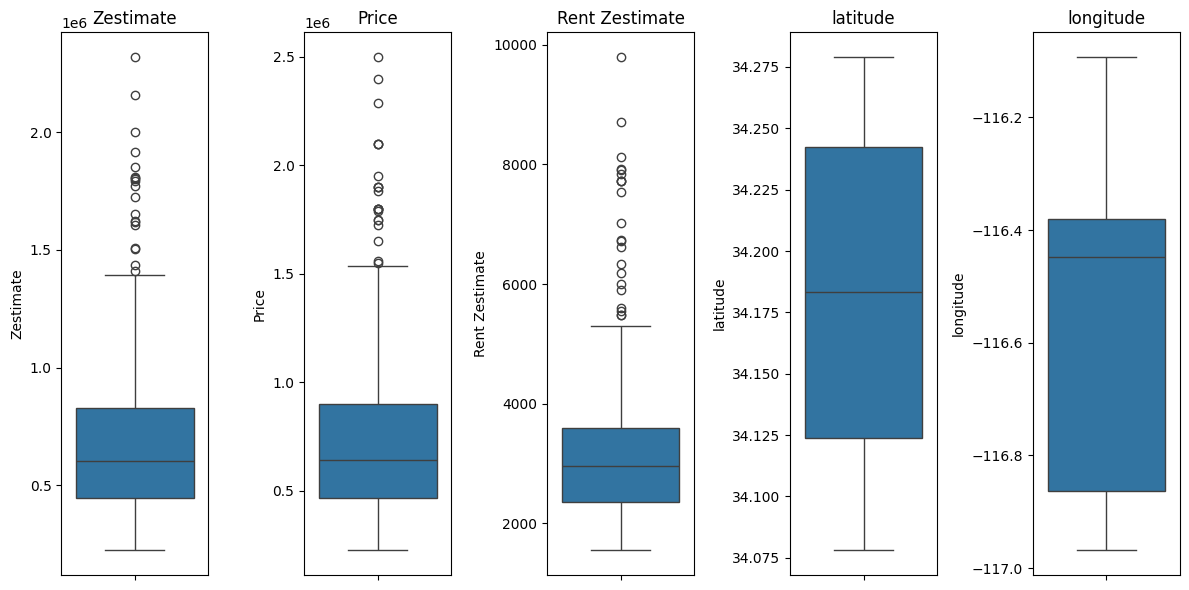

In [73]:
plt.figure(figsize=(12, 6))
for i, column in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i + 1)
    sns.boxplot(y=sales[column])
    plt.title(column)

plt.tight_layout()
plt.show()

### **Overprice and Payback**

In [74]:
sales['Overprice'] = (sales['Price'] / sales['Zestimate'])
sales['Payback'] = (sales['Price'] / sales['Rent Zestimate'])

sales.head()

<ipython-input-74-7116d6b863ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Overprice'] = (sales['Price'] / sales['Zestimate'])
<ipython-input-74-7116d6b863ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Payback'] = (sales['Price'] / sales['Rent Zestimate'])


,Zestimate,Price,Rent Zestimate,Bathrooms,Bedrooms,Street Address,City,Has 3D Model,Has Video,sgapt,Pool,latitude,longitude,Overprice,Payback
1,223200.0,399990,1786.0,2,3,Avenida La Espana Daga,Joshua Tree,0,0,For Sale (Broker),0,34.193399,-116.092657,1.792070,223.958567
2,568947.0,575000,2300.0,2,3,Prescott Trail,Joshua Tree,1,1,For Sale (Broker),0,34.109541,-116.331188,1.010639,250.000000
3,851656.0,899000,4798.0,2,3,Anaconda Drive,Joshua Tree,0,0,For Sale (Broker),0,34.100670,-116.301570,1.055591,187.369737
4,NaN,369900,1825.0,1,3,Petunia Drive,Joshua Tree,0,0,For Sale (Broker),0,34.144150,-116.316900,NaN,202.684932
5,388300.0,520000,2300.0,2,4,Demesne Road,Joshua Tree,0,0,For Sale (Broker),0,34.121443,-116.350339,1.339171,226.086957


In [75]:
(sales['Payback']).mean(), (sales['Payback']).min(), (sales['Payback']).max()

(227.76283010984793, 111.08888888888889, 974.3589743589744)

In [76]:
(sales['Overprice']).mean(), (sales['Overprice']).min(), (sales['Overprice']).max()

(1.0506288459538187, 0.8690348859357372, 1.8609102509570397)

In [77]:
sales['Payback'] = sales['Payback'].fillna(sales.groupby('City')['Payback'].transform('mean'))
sales['Rent Zestimate'] = sales['Rent Zestimate'].fillna(sales['Price'] / sales['Payback'].replace(0, np.nan))

sales['Overprice'] = sales['Overprice'].fillna(sales.groupby('City')['Overprice'].transform('mean'))
sales['Zestimate'] = sales['Zestimate'].fillna(sales['Price'] / sales['Overprice'].replace(0, np.nan))

sales.isna().sum()

<ipython-input-77-8374423a6c67>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales['Payback'] = sales['Payback'].fillna(sales.groupby('City')['Payback'].transform('mean'))
<ipython-input-77-8374423a6c67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Payback'] = sales['Payback'].fillna(sales.groupby('City')['Payback'].transform('mean'))
<ipython-input-77-8374423a6c67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,0
Zestimate,0
Price,0
Rent Zestimate,0
Bathrooms,0
Bedrooms,0
Street Address,0
City,0
Has 3D Model,0
Has Video,0
sgapt,0


### **Map**

In [78]:
import folium
from folium.plugins import MarkerCluster


map_center = [sales['latitude'].mean(), sales['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=12)


def price_to_color(price):
    if price < 550000:
        return 'green'
    elif price < 650000:
        return 'orange'
    else:
        return 'red'


marker_cluster = MarkerCluster().add_to(m)

for idx, row in sales.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Ціна: {row['Zestimate']}",
        icon=folium.Icon(color=price_to_color(row['Zestimate']))
    ).add_to(marker_cluster)


m.save('map_with_prices.html')
m

### **Price and City**


It can be seen that, on average, the highest price for real estate is in B**ig Bear Lake**, while the lowest is in **Yucca Valley**. The average price difference is 405677.
The average rental price is highest in **Big Bear City**, lowest in J**oshua Tree** with a difference of 992.
It can be concluded that the city where the property is located has a significant impact on the purchase and rental price.

<ipython-input-79-74ce658b1b11>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sales, x='City', y='Zestimate', palette='Set2')
<ipython-input-79-74ce658b1b11>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sales, x='City', y='Rent Zestimate', palette='Set2')


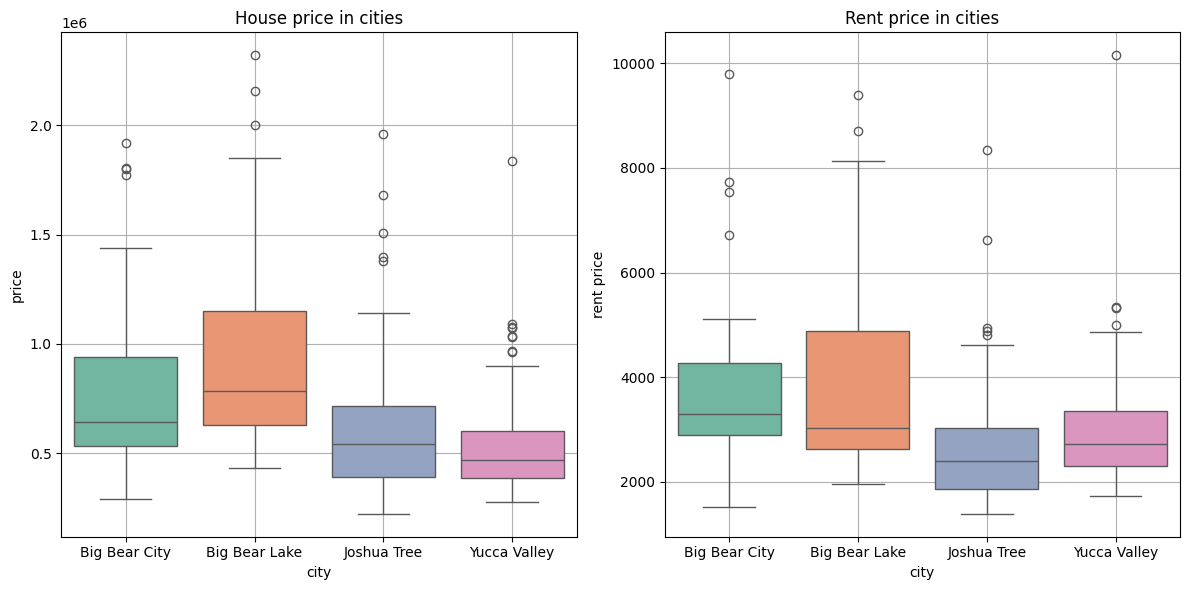

In [79]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=sales, x='City', y='Zestimate', palette='Set2')
plt.title('House price in cities')
plt.xlabel('city')
plt.ylabel('price')
plt.grid(True)


plt.subplot(1, 2, 2)
sns.boxplot(data=sales, x='City', y='Rent Zestimate', palette='Set2')
plt.title('Rent price in cities')
plt.xlabel('city')
plt.ylabel('rent price')
plt.grid(True)


plt.tight_layout()
plt.show()

In [80]:
(sales[sales['City'] == 'Big Bear Lake']['Zestimate'].mean() - sales[sales['City'] == 'Yucca Valley']['Zestimate'].mean())

405676.8878778829

In [81]:
(sales[sales['City'] == 'Big Bear City']['Rent Zestimate'].mean() - sales[sales['City'] == 'Joshua Tree']['Rent Zestimate'].mean())

991.6173325967143

### **Price and Video / 3D Model**

The graph below shows that the presence of a video or 3D model does not significantly affect the price.

<ipython-input-82-0f6170604754>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sales, x='Has 3D Model', y='Zestimate', palette='Set2')
<ipython-input-82-0f6170604754>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sales, x='Has 3D Model', y='Rent Zestimate', palette='Set2')
<ipython-input-82-0f6170604754>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sales, x='Has Video', y='Zestimate', palette='Set2')
<ipython-input-82-0f6170604754>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will

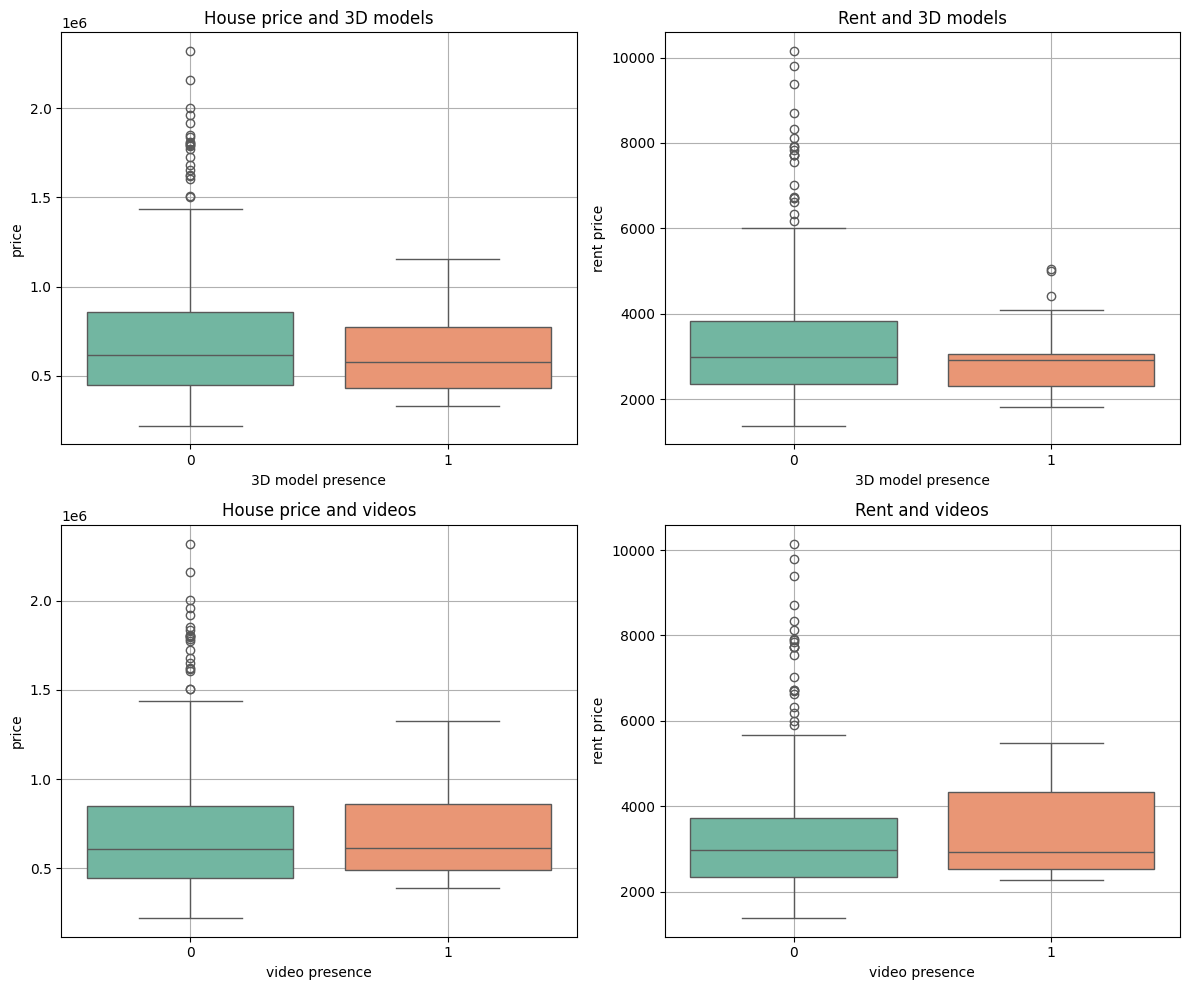

In [82]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.boxplot(data=sales, x='Has 3D Model', y='Zestimate', palette='Set2')
plt.title('House price and 3D models')
plt.xlabel('3D model presence')
plt.ylabel('price')
plt.grid(True)

plt.subplot(2, 2, 2)
sns.boxplot(data=sales, x='Has 3D Model', y='Rent Zestimate', palette='Set2')
plt.title('Rent and 3D models')
plt.xlabel('3D model presence')
plt.ylabel('rent price')
plt.grid(True)

plt.subplot(2, 2, 3)
sns.boxplot(data=sales, x='Has Video', y='Zestimate', palette='Set2')
plt.title('House price and videos')
plt.xlabel('video presence')
plt.ylabel('price')
plt.grid(True)

plt.subplot(2, 2, 4)
sns.boxplot(data=sales, x='Has Video', y='Rent Zestimate', palette='Set2')
plt.title('Rent and videos')
plt.xlabel('video presence')
plt.ylabel('rent price')
plt.grid(True)

plt.tight_layout()
plt.show()

### **Price and Type of Sale**

The data distribution graph below shows that the sale of new buildings is the most popular and on average has the highest price for both sale and rent. The difference for sale is 476858, the difference for rent is 1136.
There is not enough data to analyze the Foreclosure category, so the model may not be able to predict prices for this type of property well.

<ipython-input-83-1c67fe541b36>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sales, x='sgapt', y='Zestimate', palette='Set2')
<ipython-input-83-1c67fe541b36>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sales, x='sgapt', y='Rent Zestimate', palette='Set2')


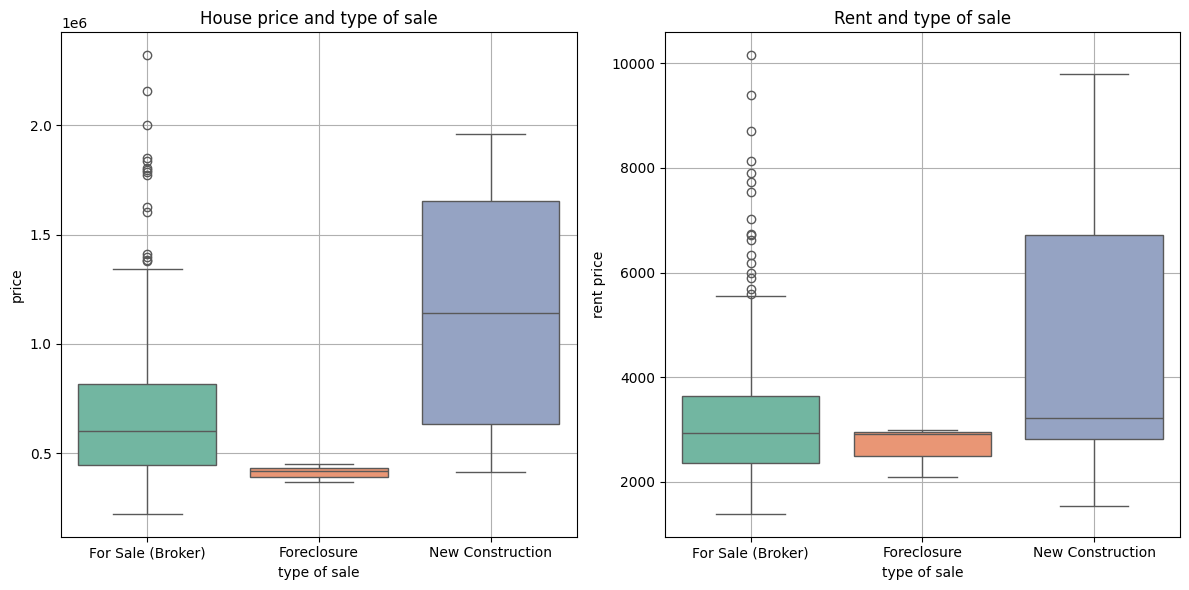

In [83]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=sales, x='sgapt', y='Zestimate', palette='Set2')
plt.title('House price and type of sale')
plt.xlabel('type of sale')
plt.ylabel('price')
plt.grid(True)


plt.subplot(1, 2, 2)
sns.boxplot(data=sales, x='sgapt', y='Rent Zestimate', palette='Set2')
plt.title('Rent and type of sale')
plt.xlabel('type of sale')
plt.ylabel('rent price')
plt.grid(True)


plt.tight_layout()
plt.show()

In [84]:
(sales[sales['sgapt'] == 'New Construction']['Zestimate'].mean() - sales[sales['sgapt'] == 'For Sale (Broker)']['Zestimate'].mean())

476857.6042220808

In [85]:
(sales[sales['sgapt'] == 'New Construction']['Rent Zestimate'].mean() - sales[sales['sgapt'] == 'For Sale (Broker)']['Rent Zestimate'].mean())

1136.2399783232372

In [86]:
sales['sgapt'].value_counts()

,count
sgapt,
For Sale (Broker),316
New Construction,25
Foreclosure,3


### **Price and Pool**


You can see that the presence of a pool affects the price, the difference is 68819 on average. However, for some reason, renting a property with a swimming pool is 386 dollars cheaper on average.

<ipython-input-87-eea95ebc9af8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sales, x='Pool', y='Zestimate', palette='Set2')
<ipython-input-87-eea95ebc9af8>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sales, x='Pool', y='Rent Zestimate', palette='Set2')


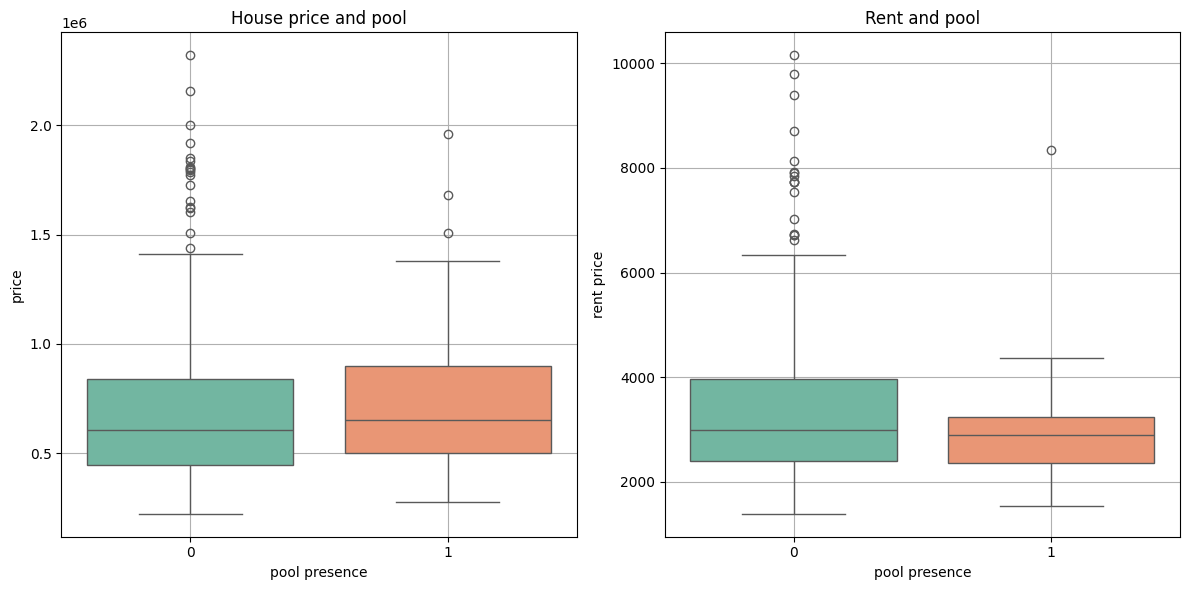

In [87]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=sales, x='Pool', y='Zestimate', palette='Set2')
plt.title('House price and pool')
plt.xlabel('pool presence')
plt.ylabel('price')
plt.grid(True)


plt.subplot(1, 2, 2)
sns.boxplot(data=sales, x='Pool', y='Rent Zestimate', palette='Set2')
plt.title('Rent and pool')
plt.xlabel('pool presence')
plt.ylabel('rent price')
plt.grid(True)


plt.tight_layout()
plt.show()

In [88]:
(sales[sales['Pool'] == 1]['Zestimate'].mean() - sales[sales['Pool'] == 0]['Zestimate'].mean())

68819.05179149471

In [89]:
(sales[sales['Pool'] == 0]['Rent Zestimate'].mean() - sales[sales['Pool'] == 1]['Rent Zestimate'].mean())

386.8194105135367

### **Price and Bathrooms, Bedrooms**

The number of bathrooms significantly affects both the sale price and the rental price. The following conclusions can be drawn:


* An increase in the number of bathrooms on average increases the sale price by 288771;
* An increase in the number of bathrooms on average increases the rental price by 1148;
* Increasing the number of bedrooms on average increases the sale price by 349235;
* Increasing the number of bedrooms increases the rental price by 1505 on average.

<ipython-input-90-5bd57430e696>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sales, x='Bathrooms', y='Zestimate', palette='Set2')
<ipython-input-90-5bd57430e696>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sales, x='Bathrooms', y='Rent Zestimate', palette='Set2')
<ipython-input-90-5bd57430e696>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sales, x='Bedrooms', y='Zestimate', palette='Set2')
<ipython-input-90-5bd57430e696>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be rem

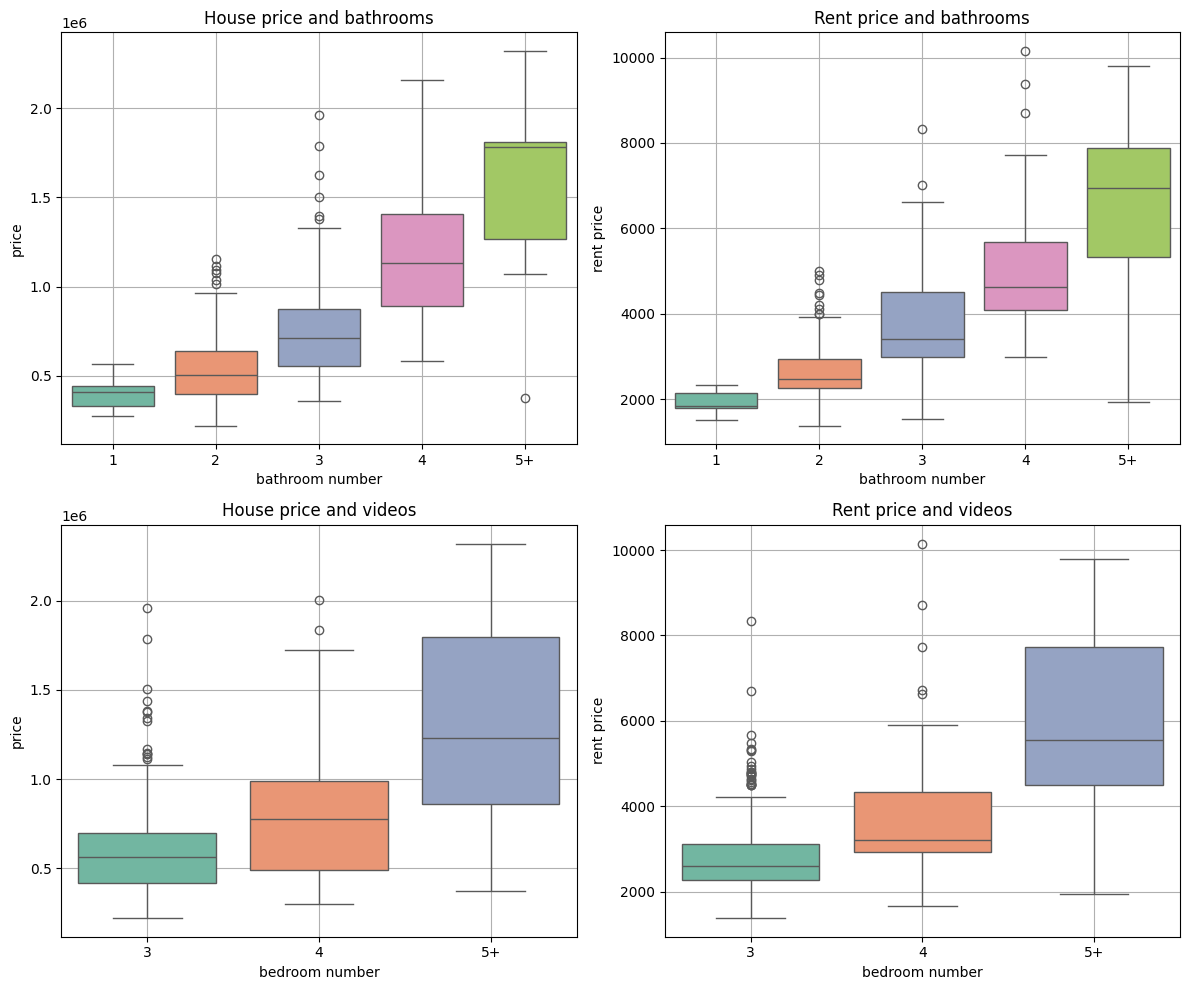

In [90]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.boxplot(data=sales, x='Bathrooms', y='Zestimate', palette='Set2')
plt.title('House price and bathrooms')
plt.xlabel('bathroom number')
plt.ylabel('price')
plt.grid(True)

plt.subplot(2, 2, 2)
sns.boxplot(data=sales, x='Bathrooms', y='Rent Zestimate', palette='Set2')
plt.title('Rent price and bathrooms')
plt.xlabel('bathroom number')
plt.ylabel('rent price')
plt.grid(True)

plt.subplot(2, 2, 3)
sns.boxplot(data=sales, x='Bedrooms', y='Zestimate', palette='Set2')
plt.title('House price and videos')
plt.xlabel('bedroom number')
plt.ylabel('price')
plt.grid(True)

plt.subplot(2, 2, 4)
sns.boxplot(data=sales, x='Bedrooms', y='Rent Zestimate', palette='Set2')
plt.title('Rent price and videos')
plt.xlabel('bedroom number')
plt.ylabel('rent price')
plt.grid(True)

plt.tight_layout()
plt.show()

In [91]:
mean_values = [sales[sales['Bathrooms'] == count]['Zestimate'].mean() for count in  ['5+', '4', '3', '2', '1']]
differences = [mean_values[i] - mean_values[i + 1] for i in range(len(mean_values) - 1)]
sum(differences) / len(differences)

288770.69654430373

In [92]:
mean_values = [sales[sales['Bathrooms'] == count]['Rent Zestimate'].mean() for count in  ['5+', '4', '3', '2', '1']]
differences = [mean_values[i] - mean_values[i + 1] for i in range(len(mean_values) - 1)]
sum(differences) / len(differences)

1148.666166564506

In [93]:
mean_values = [sales[sales['Bedrooms'] == count]['Zestimate'].mean() for count in  ['5+', '4', '3']]
differences = [mean_values[i] - mean_values[i + 1] for i in range(len(mean_values) - 1)]
sum(differences) / len(differences)

349235.22818682593

In [94]:
mean_values = [sales[sales['Bedrooms'] == count]['Rent Zestimate'].mean() for count in  ['5+', '4', '3']]
differences = [mean_values[i] - mean_values[i + 1] for i in range(len(mean_values) - 1)]
sum(differences) / len(differences)

1504.8446035772954

### **Pearson's coefficient**


Before checking the Pearson's coefficient, it was necessary to create new binary variables to analyze the categorical variables **Bathrooms, Bedrooms, sgapt**. The analysis does not include the variables **Street Address, City**, as this data is already available in the columns **latitude, longitude**.

In [95]:
sales.head()

,Zestimate,Price,Rent Zestimate,Bathrooms,Bedrooms,Street Address,City,Has 3D Model,Has Video,sgapt,Pool,latitude,longitude,Overprice,Payback
1,223200.000000,399990,1786.0,2,3,Avenida La Espana Daga,Joshua Tree,0,0,For Sale (Broker),0,34.193399,-116.092657,1.792070,223.958567
2,568947.000000,575000,2300.0,2,3,Prescott Trail,Joshua Tree,1,1,For Sale (Broker),0,34.109541,-116.331188,1.010639,250.000000
3,851656.000000,899000,4798.0,2,3,Anaconda Drive,Joshua Tree,0,0,For Sale (Broker),0,34.100670,-116.301570,1.055591,187.369737
4,345121.403527,369900,1825.0,1,3,Petunia Drive,Joshua Tree,0,0,For Sale (Broker),0,34.144150,-116.316900,1.071797,202.684932
5,388300.000000,520000,2300.0,2,4,Demesne Road,Joshua Tree,0,0,For Sale (Broker),0,34.121443,-116.350339,1.339171,226.086957


In [96]:
sales = pd.get_dummies(sales, columns=['Bathrooms', 'Bedrooms', 'sgapt'], prefix=['bath', 'bed', 'type'])
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 344 entries, 1 to 347
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Zestimate               344 non-null    float64 
 1   Price                   344 non-null    int64   
 2   Rent Zestimate          344 non-null    float64 
 3   Street Address          344 non-null    category
 4   City                    344 non-null    category
 5   Has 3D Model            344 non-null    int64   
 6   Has Video               344 non-null    int64   
 7   Pool                    344 non-null    int64   
 8   latitude                344 non-null    float64 
 9   longitude               344 non-null    float64 
 10  Overprice               344 non-null    float64 
 11  Payback                 344 non-null    float64 
 12  bath_1                  344 non-null    bool    
 13  bath_2                  344 non-null    bool    
 14  bath_3                  344 non

In [97]:
sales.head()

,Zestimate,Price,Rent Zestimate,Street Address,City,Has 3D Model,Has Video,Pool,latitude,longitude,...,bath_2,bath_3,bath_4,bath_5+,bed_3,bed_4,bed_5+,type_For Sale (Broker),type_Foreclosure,type_New Construction
1,223200.000000,399990,1786.0,Avenida La Espana Daga,Joshua Tree,0,0,0,34.193399,-116.092657,...,True,False,False,False,True,False,False,True,False,False
2,568947.000000,575000,2300.0,Prescott Trail,Joshua Tree,1,1,0,34.109541,-116.331188,...,True,False,False,False,True,False,False,True,False,False
3,851656.000000,899000,4798.0,Anaconda Drive,Joshua Tree,0,0,0,34.100670,-116.301570,...,True,False,False,False,True,False,False,True,False,False
4,345121.403527,369900,1825.0,Petunia Drive,Joshua Tree,0,0,0,34.144150,-116.316900,...,False,False,False,False,True,False,False,True,False,False
5,388300.000000,520000,2300.0,Demesne Road,Joshua Tree,0,0,0,34.121443,-116.350339,...,True,False,False,False,False,True,False,True,False,False


Below is a table of Pearson's coefficients for some variables. Other variables will be analyzed using the matrix below.

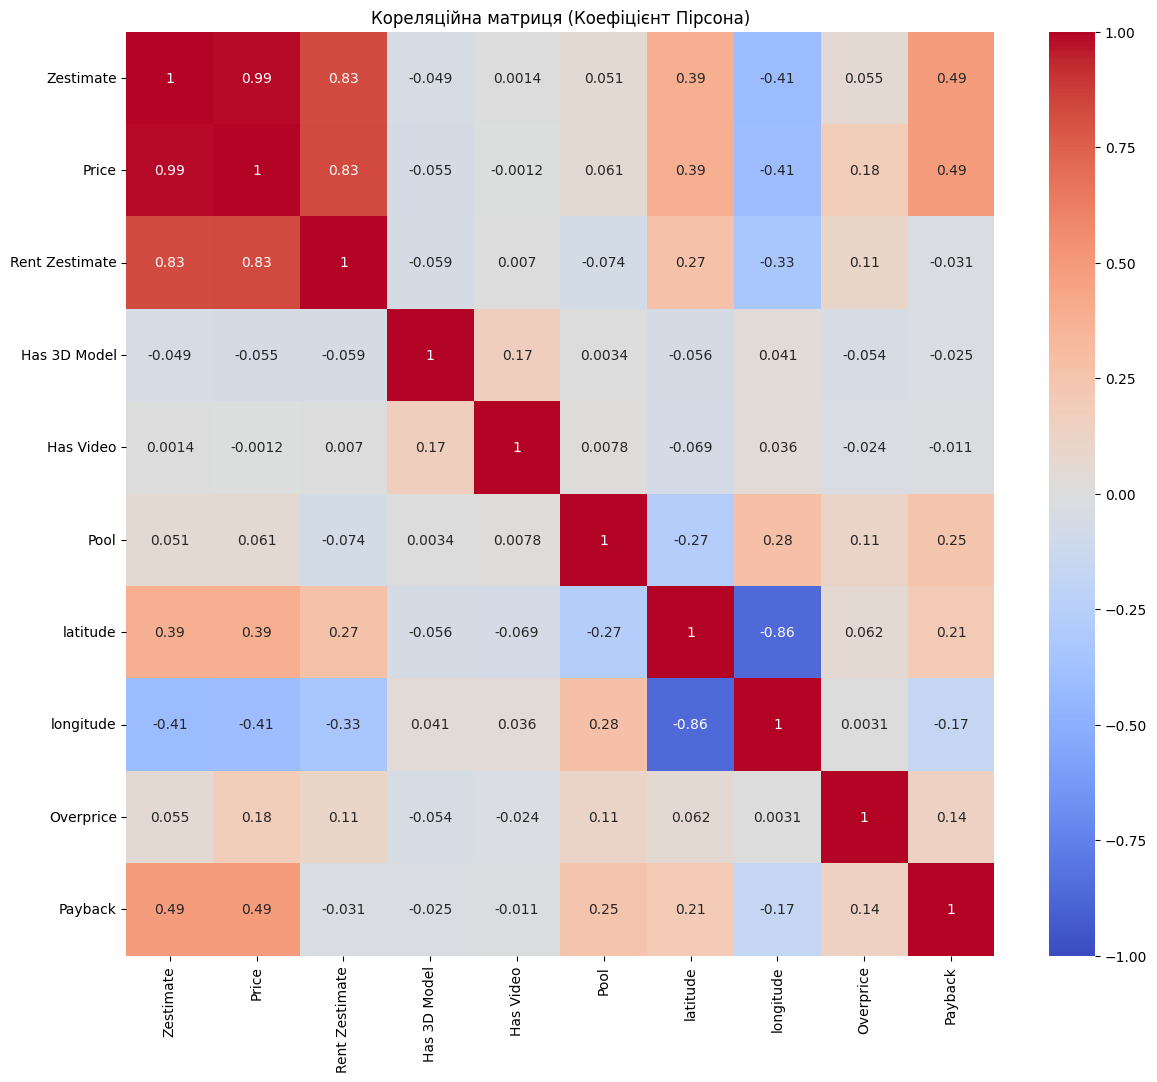

In [98]:
cols_to_estimate = sales[['Zestimate', 'Price', 'Rent Zestimate', 'Has 3D Model', 'Has Video', 'Pool', 'latitude', 'longitude', 'Overprice', 'Payback']]

plt.figure(figsize=(14, 12))
sns.heatmap(cols_to_estimate.corr(method='pearson'), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Кореляційна матриця (Коефіцієнт Пірсона)")
plt.show()

At this stage, we noticed a high linear dependence between latitude and longitude (which is usually a coincidence), which is bad between independent variables in linear regression - it can cause multicollinearity and, accordingly, deterioration of predictive accuracy.

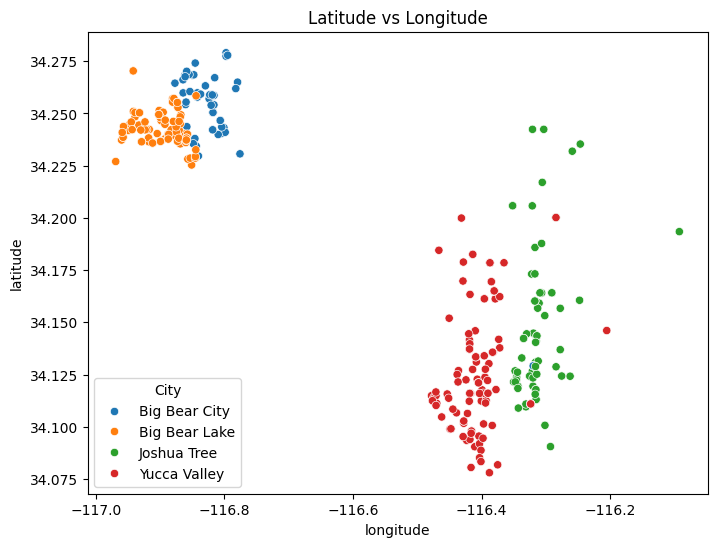

In [99]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=sales, x='longitude', y='latitude', hue='City')
plt.title('Latitude vs Longitude')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

The dot plot shows 4 clusters - 4 cities. It is not clear why a linear relationship is created. It was decided to use a new variable **distance_to_centre** instead of **latitude, longitude** in the analysis, which shows the distance to the city center where the property is located. This way we will get rid of the linear relationship between the independent variables.

In [100]:
joshua_tree_lat, joshua_tree_lon = 34.130459, 116.317307
big_bear_city_lat, big_bear_city_lon = 34.2619, -116.8456
big_bear_lake_lat, big_bear_lake_lon = 34.2439, -116.9114
yucca_valley_lat, yucca_valley_lon = 34.1142, -116.4328


def haversine(lat1, lon1, lat2, lon2):
    R = 6371  #Радіус Землі
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c


sales['distance_to_centre'] = np.where(
    sales['City'] == 'Joshua Tree',
    sales.apply(lambda row: haversine(row['latitude'], row['longitude'], joshua_tree_lat, joshua_tree_lon), axis=1),
    np.where(
        sales['City'] == 'Big Bear City',
        sales.apply(lambda row: haversine(row['latitude'], row['longitude'], big_bear_city_lat, big_bear_city_lon), axis=1),
        np.where(
            sales['City'] == 'Big Bear Lake',
            sales.apply(lambda row: haversine(row['latitude'], row['longitude'], big_bear_lake_lat, big_bear_lake_lon), axis=1),
            sales.apply(lambda row: haversine(row['latitude'], row['longitude'], yucca_valley_lat, yucca_valley_lon), axis=1)
        )
    )
)

sales.head()

,Zestimate,Price,Rent Zestimate,Street Address,City,Has 3D Model,Has Video,Pool,latitude,longitude,...,bath_3,bath_4,bath_5+,bed_3,bed_4,bed_5+,type_For Sale (Broker),type_Foreclosure,type_New Construction,distance_to_centre
1,223200.000000,399990,1786.0,Avenida La Espana Daga,Joshua Tree,0,0,0,34.193399,-116.092657,...,False,False,False,True,False,False,True,False,False,10660.693987
2,568947.000000,575000,2300.0,Prescott Trail,Joshua Tree,1,1,0,34.109541,-116.331188,...,False,False,False,True,False,False,True,False,False,10653.200604
3,851656.000000,899000,4798.0,Anaconda Drive,Joshua Tree,0,0,0,34.100670,-116.301570,...,False,False,False,True,False,False,True,False,False,10655.743860
4,345121.403527,369900,1825.0,Petunia Drive,Joshua Tree,0,0,0,34.144150,-116.316900,...,False,False,False,True,False,False,True,False,False,10651.183775
5,388300.000000,520000,2300.0,Demesne Road,Joshua Tree,0,0,0,34.121443,-116.350339,...,False,False,False,False,True,False,True,False,False,10651.041896


### **Conclusions**.

We check the value of the Pearson's coefficient again. We see that the variables Zestimate, Price, Rent Zestimate have a high positive correlation with each other; Price, Zestimate have a moderate correlation with Payback. The following two models will be built:


* **Zestimate: Has 3D Model, Has Video, Pool, bath_1, bath_3, bath_4, bath_5+, bed_3, bed_4, type_For Sale (Broker), type_Foreclosure, distance_to_centre**.
The dummies variables, which contain unnecessary information, are not included. The model will also not include Price, Rent Zestimate, because we assume that we do not know these data at the time of the property price assessment. The model is unlikely to produce a qualitative result, because there is no high linear relationship between the dependent variable and the independent variables.
* **Rent Zestimate: Zestimate, Has 3D Model, Has Video, Pool, bath_1, bath_3, bath_4, bath_5+, bed_3, bed_4, type_For Sale (Broker), type_Foreclosure, distance_to_centre**. The dummies variables, which contain unnecessary information, are not included. The model includes Zestimate because we assume that we know the estimated value of the property. The model should give a more or less good result, given that Zestimate is highly correlated with Rent Zestimate.

In [101]:
sales.columns

Index(['Zestimate', 'Price', 'Rent Zestimate', 'Street Address', 'City',
       'Has 3D Model', 'Has Video', 'Pool', 'latitude', 'longitude',
       'Overprice', 'Payback', 'bath_1', 'bath_2', 'bath_3', 'bath_4',
       'bath_5+', 'bed_3', 'bed_4', 'bed_5+', 'type_For Sale (Broker)',
       'type_Foreclosure', 'type_New Construction', 'distance_to_centre'],
      dtype='object')

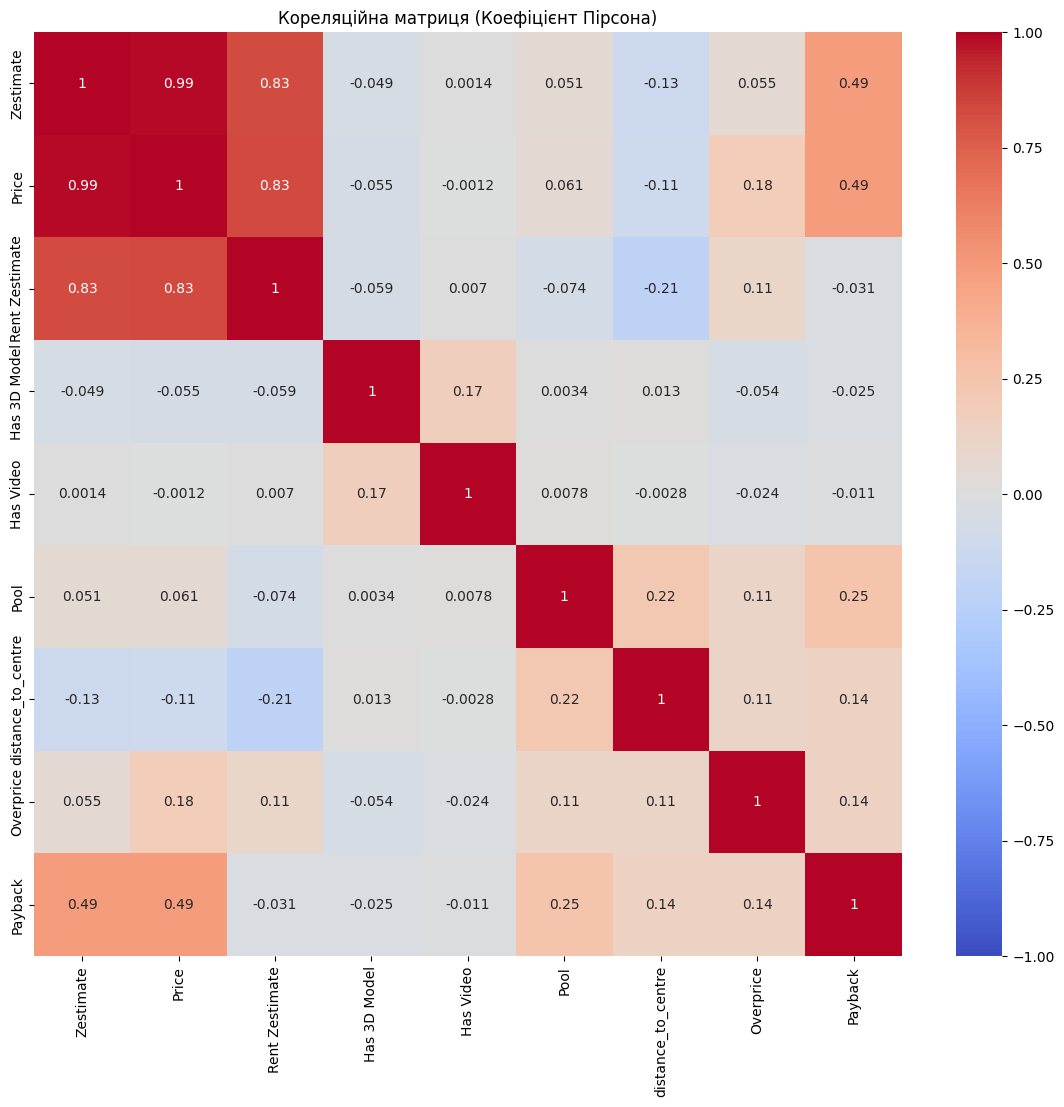

In [102]:
new_cols = sales[['Zestimate', 'Price', 'Rent Zestimate', 'Has 3D Model', 'Has Video', 'Pool', 'distance_to_centre', 'Overprice', 'Payback']]

plt.figure(figsize=(14, 12))
sns.heatmap(new_cols.corr(method='pearson'), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Кореляційна матриця (Коефіцієнт Пірсона)")
plt.show()

In [103]:
correlation_matrix = sales[['Zestimate', 'Price', 'Rent Zestimate',
     'Has 3D Model', 'Has Video', 'Pool',
       'Overprice', 'Payback', 'bath_1', 'bath_2', 'bath_3', 'bath_4', 'bath_5+', 'bed_3', 'bed_4', 'bed_5+','type_For Sale (Broker)', 'type_New Construction', 'distance_to_centre']].corr(method='pearson')
correlation_matrix[correlation_matrix.abs() > 0.4]

,Zestimate,Price,Rent Zestimate,Has 3D Model,Has Video,Pool,Overprice,Payback,bath_1,bath_2,bath_3,bath_4,bath_5+,bed_3,bed_4,bed_5+,type_For Sale (Broker),type_New Construction,distance_to_centre
Zestimate,1.000000,0.988036,0.826120,NaN,NaN,NaN,NaN,0.485395,NaN,-0.483303,NaN,0.426485,0.462127,-0.409302,NaN,0.473523,NaN,NaN,NaN
Price,0.988036,1.000000,0.828437,NaN,NaN,NaN,NaN,0.489673,NaN,-0.489072,NaN,0.429518,0.478464,-0.418935,NaN,0.498183,NaN,NaN,NaN
Rent Zestimate,0.826120,0.828437,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,-0.518955,NaN,0.417137,0.447838,-0.451315,NaN,0.523455,NaN,NaN,NaN
Has 3D Model,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Has Video,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pool,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Overprice,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Payback,0.485395,0.489673,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bath_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bath_2,-0.483303,-0.489072,-0.518955,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.666269,NaN,NaN,0.425952,NaN,NaN,NaN,NaN,NaN


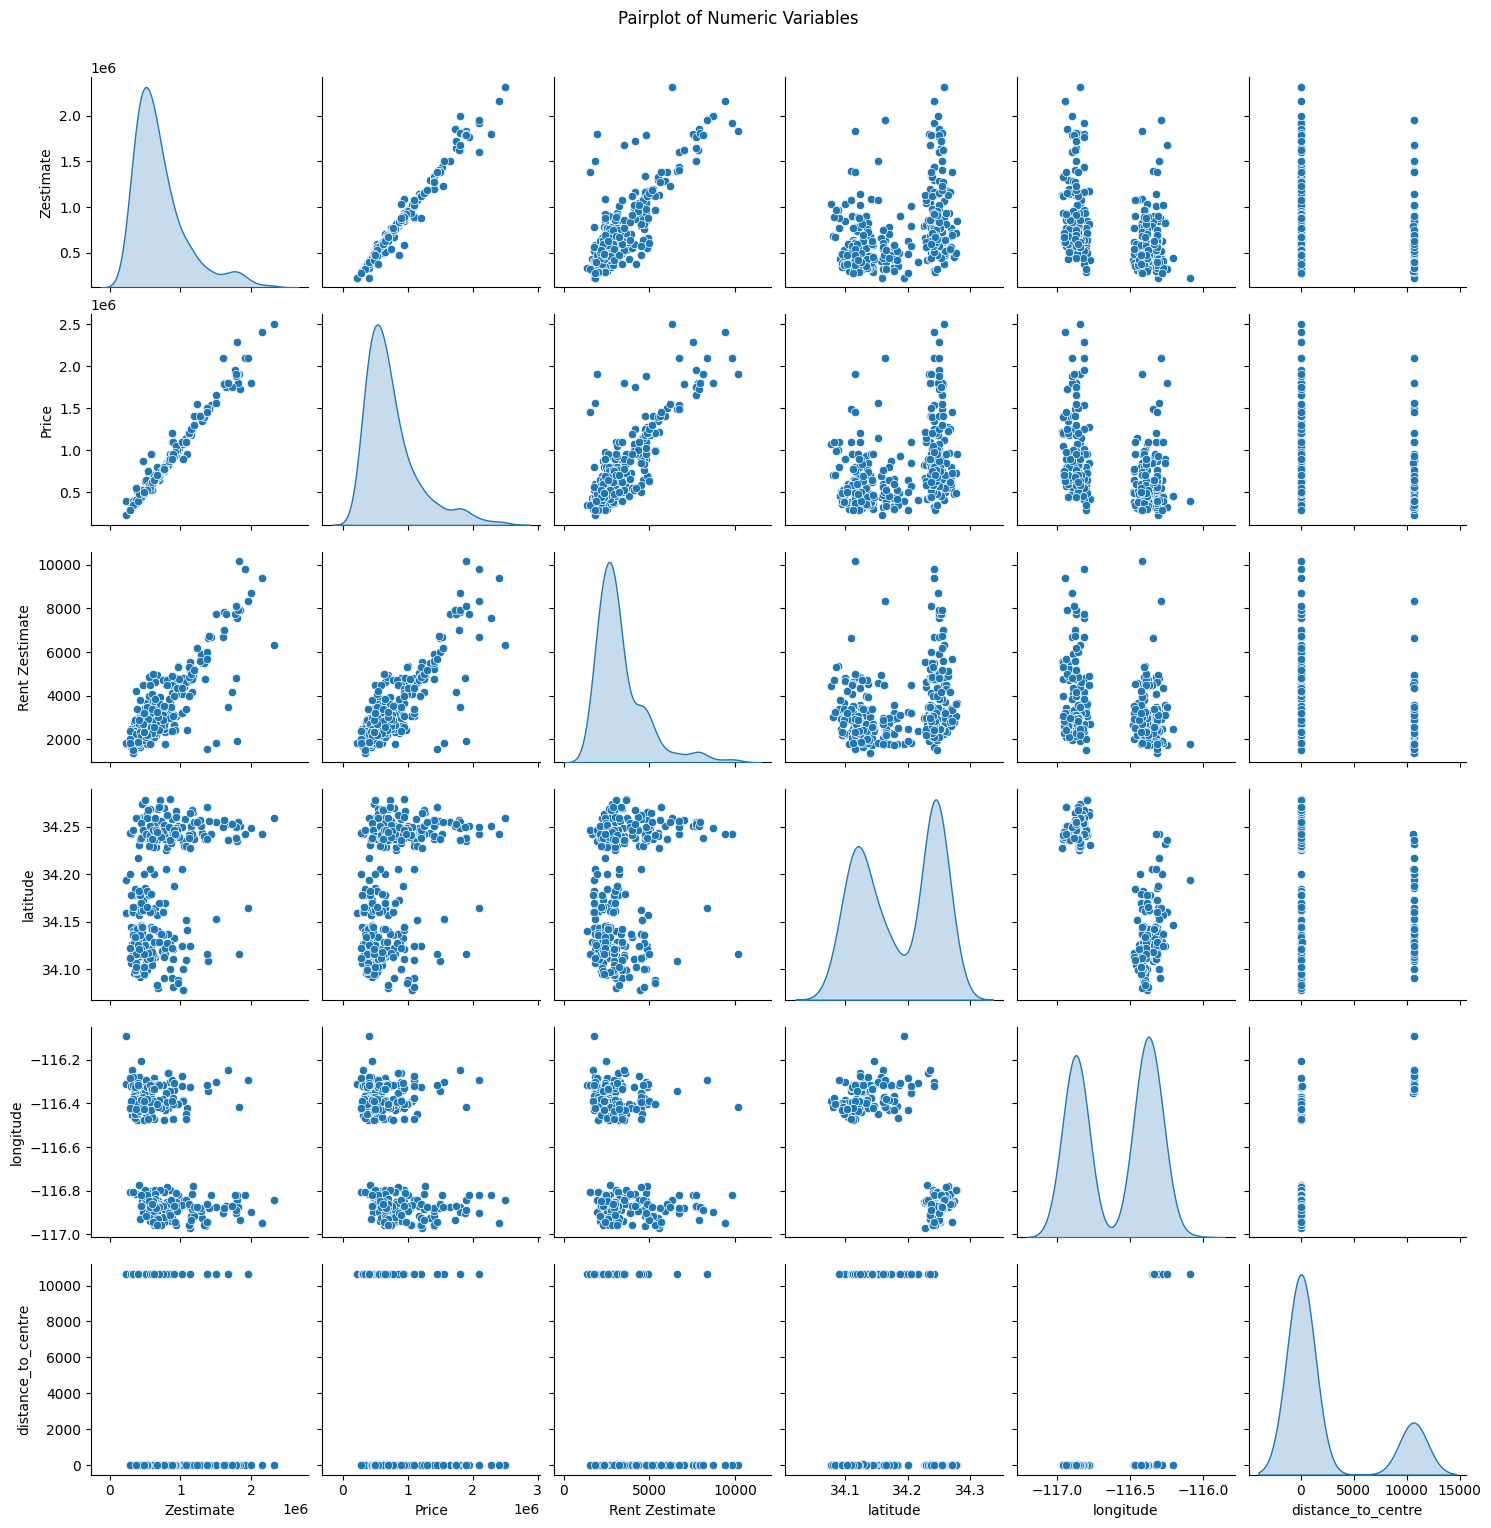

In [104]:
numeric_cols = sales[['Zestimate', 'Price', 'Rent Zestimate', 'latitude', 'longitude', 'distance_to_centre']]

sns.pairplot(numeric_cols, diag_kind='kde', markers=["o", "s"])

plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()

In [105]:
sales.head()

,Zestimate,Price,Rent Zestimate,Street Address,City,Has 3D Model,Has Video,Pool,latitude,longitude,...,bath_3,bath_4,bath_5+,bed_3,bed_4,bed_5+,type_For Sale (Broker),type_Foreclosure,type_New Construction,distance_to_centre
1,223200.000000,399990,1786.0,Avenida La Espana Daga,Joshua Tree,0,0,0,34.193399,-116.092657,...,False,False,False,True,False,False,True,False,False,10660.693987
2,568947.000000,575000,2300.0,Prescott Trail,Joshua Tree,1,1,0,34.109541,-116.331188,...,False,False,False,True,False,False,True,False,False,10653.200604
3,851656.000000,899000,4798.0,Anaconda Drive,Joshua Tree,0,0,0,34.100670,-116.301570,...,False,False,False,True,False,False,True,False,False,10655.743860
4,345121.403527,369900,1825.0,Petunia Drive,Joshua Tree,0,0,0,34.144150,-116.316900,...,False,False,False,True,False,False,True,False,False,10651.183775
5,388300.000000,520000,2300.0,Demesne Road,Joshua Tree,0,0,0,34.121443,-116.350339,...,False,False,False,False,True,False,True,False,False,10651.041896


# **Models Development**

### **Data Preparation**

In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
scaler = StandardScaler()

sales[['Zestimate', 'Rent Zestimate', 'distance_to_centre']] = scaler.fit_transform(sales[['Zestimate', 'Rent Zestimate', 'distance_to_centre']])

In [108]:
sales.head()

,Zestimate,Price,Rent Zestimate,Street Address,City,Has 3D Model,Has Video,Pool,latitude,longitude,...,bath_3,bath_4,bath_5+,bed_3,bed_4,bed_5+,type_For Sale (Broker),type_Foreclosure,type_New Construction,distance_to_centre
1,-1.295234,399990,-1.041054,Avenida La Espana Daga,Joshua Tree,0,0,0,34.193399,-116.092657,...,False,False,False,True,False,False,True,False,False,1.963086
2,-0.381945,575000,-0.692870,Prescott Trail,Joshua Tree,1,1,0,34.109541,-116.331188,...,False,False,False,True,False,False,True,False,False,1.961347
3,0.364830,899000,0.999275,Anaconda Drive,Joshua Tree,0,0,0,34.100670,-116.301570,...,False,False,False,True,False,False,True,False,False,1.961937
4,-0.973179,369900,-1.014635,Petunia Drive,Joshua Tree,0,0,0,34.144150,-116.316900,...,False,False,False,True,False,False,True,False,False,1.960879
5,-0.859123,520000,-0.692870,Demesne Road,Joshua Tree,0,0,0,34.121443,-116.350339,...,False,False,False,False,True,False,True,False,False,1.960846


## **Model 1**

* **Zestimate: Has 3D Model, Has Video, Pool, bath_1, bath_3, bath_4, bath_5+, bed_3, bed_4, type_For Sale (Broker), type_Foreclosure, distance_to_centre**.
The dummies variables, which contain unnecessary information, are not included. The model will also not include Price, Rent Zestimate, because we assume that we do not know these data at the time of the property price assessment. The model is unlikely to produce a qualitative result, because there is no high linear relationship between the dependent variable and the independent variables.

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [110]:
X_price = sales[['Has 3D Model', 'Has Video', 'Pool', 'bath_1', 'bath_3', 'bath_4', 'bath_5+', 'bed_3', 'bed_4', 'type_For Sale (Broker)', 'type_Foreclosure', 'distance_to_centre']]
y_price = sales['Zestimate']

X_train, X_test, y_train, y_test = train_test_split(X_price, y_price, test_size=0.2, random_state=145)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### **Results**

In [111]:
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error

In [112]:
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R^2 Score: {r2_score(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')

Mean Squared Error: 0.5806699130674942
R^2 Score: 0.6262641027202742
RMSE: 0.7620170031354249


In [113]:
pd.DataFrame(model.coef_, index=X_train.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

,Importance
bath_5+,1.847121
bath_4,1.511495
bath_3,0.503108
Has Video,0.206263
Pool,0.114177
Has 3D Model,-0.011544
distance_to_centre,-0.051778
bed_4,-0.182669
bath_1,-0.227832
bed_3,-0.272240


In [114]:
equation = "Y = " + " + ".join(f"{coef:.4f} * X{i + 1}" for i, coef in enumerate(model.coef_))
equation += f" + {model.intercept_:.4f}"

print("Рівняння регресії:")
print(equation)

Рівняння регресії:
Y = -0.0115 * X1 + 0.2063 * X2 + 0.1142 * X3 + -0.2278 * X4 + 0.5031 * X5 + 1.5115 * X6 + 1.8471 * X7 + -0.2722 * X8 + -0.1827 * X9 + -0.6726 * X10 + -1.0145 * X11 + -0.0518 * X12 + 0.4362


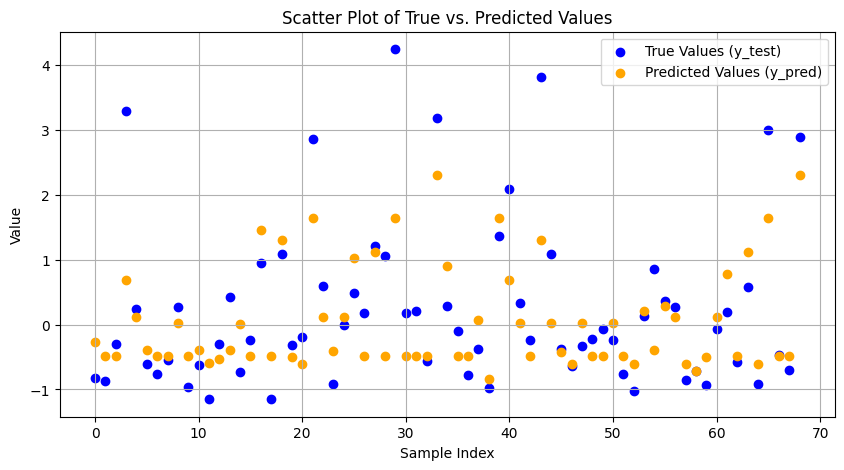

In [115]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, label='True Values (y_test)', color='blue')
plt.scatter(range(len(y_pred)), y_pred, label='Predicted Values (y_pred)', color='orange')
plt.title('Scatter Plot of True vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

## **Model 2**


* **Rent Zestimate: Zestimate, Has 3D Model, Has Video, Pool, bath_1, bath_3, bath_4, bath_5+, bed_3, bed_4, type_For Sale (Broker), type_Foreclosure, distance_to_centre**. The dummies variables, which contain unnecessary information, are not included. The model includes Zestimate because we assume that we know the estimated value of the property. The model should give a more or less good result, given that Zestimate is highly correlated with Rent Zestimate.

In [116]:
X_rent = sales[['Zestimate', 'Has 3D Model', 'Has Video', 'Pool', 'bath_1', 'bath_3', 'bath_4', 'bath_5+', 'bed_3', 'bed_4', 'type_For Sale (Broker)', 'type_Foreclosure', 'distance_to_centre']]
y_rent = sales['Rent Zestimate']

X_train, X_test, y_train, y_test = train_test_split(X_rent, y_rent, test_size=0.2, random_state=98)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### **Results**

In [117]:
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R^2 Score: {r2_score(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')

Mean Squared Error: 0.2631745411409593
R^2 Score: 0.7238564919398139
RMSE: 0.5130054006937542


In [118]:
pd.DataFrame(model.coef_, index=X_train.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

,Importance
Zestimate,0.630894
bath_4,0.509929
type_Foreclosure,0.494562
bath_5+,0.453442
bath_3,0.344897
type_For Sale (Broker),0.182407
Has Video,0.076149
distance_to_centre,-0.051150
Has 3D Model,-0.148358
bath_1,-0.206668


In [119]:
equation = "Y = " + " + ".join(f"{coef:.4f} * X{i + 1}" for i, coef in enumerate(model.coef_))
equation += f" + {model.intercept_:.4f}"

print("Рівняння регресії:")
print(equation)

Рівняння регресії:
Y = 0.6309 * X1 + -0.1484 * X2 + 0.0761 * X3 + -0.2399 * X4 + -0.2067 * X5 + 0.3449 * X6 + 0.5099 * X7 + 0.4534 * X8 + -0.4946 * X9 + -0.4957 * X10 + 0.1824 * X11 + 0.4946 * X12 + -0.0511 * X13 + 0.1502


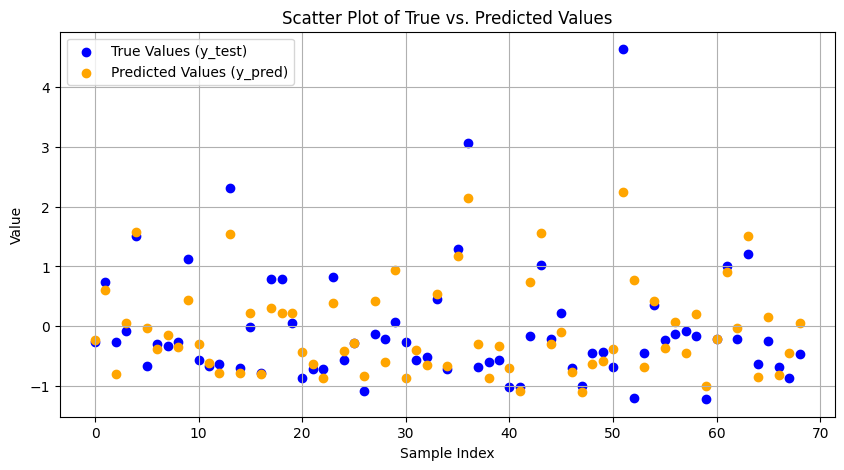

In [120]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, label='True Values (y_test)', color='blue')
plt.scatter(range(len(y_pred)), y_pred, label='Predicted Values (y_pred)', color='orange')
plt.title('Scatter Plot of True vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()